# Ayush Singh Rawat 
# Car Price Prediction Project
This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:
   
   
    name
    year
    selling_price
    km_driven
    fuel
    seller_type
    transmission


### Importing Dependency 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Data Collection and Pre-processing 

In [7]:
data = pd.read_csv("car data.csv")

In [8]:
data.head() #print top5 row of dataframe

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
data.shape #checking number of row and coloumn

(301, 9)

In [10]:
data.info() #getting some information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
data.isnull().sum() #checking null value or missing value

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
#checking the distribution of categorical data
print(data['Fuel_Type'].value_counts())

print(data['Seller_Type'].value_counts())

print(data['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


### Encode the categorical data

In [14]:
data.replace({'Fuel_Type':{'Petrol':0 , 'Diesel':1 , 'CNG': 2 }},inplace=True)

data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

data.replace({'Transmission':{'Manual':0 , 'Automatic':1}},inplace=True)

In [15]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


### Split into data and target

In [18]:
X = data.drop(['Car_Name','Selling_Price'],axis = 1)
Y = data['Selling_Price']

In [19]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [20]:
X.shape

(301, 7)

In [21]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [22]:
Y.shape

(301,)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=5,test_size=0.2)

### Model Evalution

In [24]:
lin = LinearRegression()

In [25]:
lin.fit(X_train,Y_train)

LinearRegression()

In [26]:
pred = lin.predict(X_train)

In [27]:
acc_score = metrics.r2_score(Y_train,pred)
print("R sq Error",acc_score)

R sq Error 0.8741731316387884


### Visualize the actual prices and Predicted prices 

[]

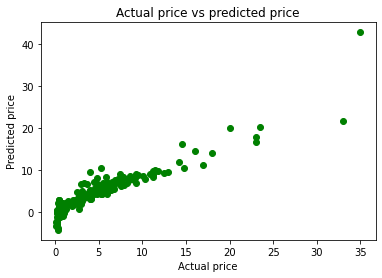

In [29]:
plt.scatter(Y_train,pred,color = 'g')
plt.title("Actual price vs predicted price")
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.plot()

In [30]:
y_pred = lin.predict(X_test)

In [31]:
acc = metrics.r2_score(Y_test,y_pred)
print("r sq error",acc)

r sq error 0.8650320546213527


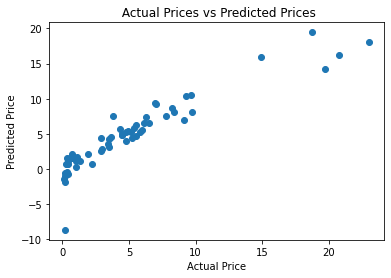

In [32]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

## Lasso regression

In [38]:
lr = Lasso()  # loading the linear regression model

In [39]:
lr.fit(X_train,Y_train)

Lasso()

In [40]:
pred = lr.predict(X_train)  # prediction on Training data

In [41]:
accu = metrics.r2_score(Y_train,pred) # R squared Error
print(accu)

0.83549406390235


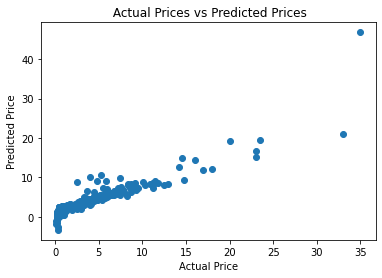

In [42]:
#Visualize the actual prices and Predicted prices
plt.scatter(Y_train, pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [43]:
test_data = lr.predict(X_test)

In [44]:
error_score = metrics.r2_score(Y_test, test_data)
print("R squared Error : ", error_score)

R squared Error :  0.8072510341947788


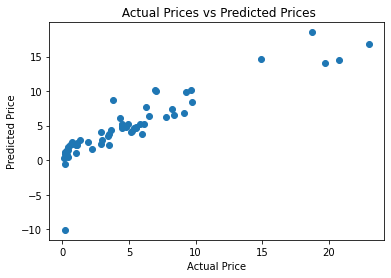

In [47]:
plt.scatter(Y_test, test_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()